Required libraries

In [ ]:
!pip3 install numpy
!pip3 install pandas
!pip3 install matplotlib
!pip3 install tensorflow

##Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import tensorflow as tf

##Importing and preparing the dataset

In [2]:
dataset = pd.read_csv('Load Profiles.csv')
dataset

,Date/Time,Heating/Cooling,Fans,InteriorLights,ExteriorLights,InteriorEquipment,Misc : InteriorEquipment
0,01/01 01:00:00,0.249108,0.048803,0.061268,0.011206,2.826843,0.315209
1,01/01 02:00:00,0.286937,0.056214,0.035740,0.006537,3.130111,0.290224
2,01/01 03:00:00,0.313726,0.061462,0.025528,0.004669,3.371758,0.286859
3,01/01 04:00:00,0.336854,0.065993,0.025528,0.004669,3.607986,0.282821
4,01/01 05:00:00,0.358424,0.070219,0.025528,0.004669,3.888659,0.272138
...,...,...,...,...,...,...,...
8755,12/31 20:00:00,0.098779,0.019352,0.295776,0.054100,2.069969,0.501625
8756,12/31 21:00:00,0.105840,0.020735,0.269368,0.049269,2.015142,0.518871
8757,12/31 22:00:00,0.112770,0.022093,0.227114,0.041541,1.967728,0.506757
8758,12/31 23:00:00,0.129033,0.025279,0.169015,0.030914,1.971973,0.438533


In [3]:
Total = []
for row in dataset.to_numpy():
    Total.append(np.sum(row[1:]))

In [4]:
def create_dataset(data, n):
    return np.append(data[n:len(data)], data[:n])

##Splitting the dataset into training and test sets

In [5]:
look_back = 1
x = np.array(Total)
y = create_dataset(x, look_back)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [6]:
x_train = np.reshape(x_train, (x_train.shape[0], 1, 1))
x_test = np.reshape(x_test, (x_test.shape[0], 1, 1))

In [7]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

##LSTM Model

In [8]:
lstm = tf.keras.models.Sequential()
lstm.add(tf.keras.layers.LSTM(15, input_shape=(1, look_back)))
lstm.add(tf.keras.layers.Dense(1))
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001)
lstm.compile(optimizer = 'adam', loss = 'mean_squared_error')
hist_lstm = lstm.fit(x_train, y_train, epochs=10)

Epoch 1/10
206/206 [==============================] - 3s 2ms/step - loss: 4.8792
Epoch 2/10
206/206 [==============================] - 0s 2ms/step - loss: 0.8085
Epoch 3/10
206/206 [==============================] - 0s 2ms/step - loss: 0.2895
Epoch 4/10
206/206 [==============================] - 0s 2ms/step - loss: 0.1772
Epoch 5/10
206/206 [==============================] - 0s 2ms/step - loss: 0.1493
Epoch 6/10
206/206 [==============================] - 0s 2ms/step - loss: 0.1514
Epoch 7/10
206/206 [==============================] - 0s 2ms/step - loss: 0.1341
Epoch 8/10
206/206 [==============================] - 0s 2ms/step - loss: 0.1381
Epoch 9/10
206/206 [==============================] - 0s 2ms/step - loss: 0.1437
Epoch 10/10
206/206 [==============================] - 0s 2ms/step - loss: 0.1400


##Results

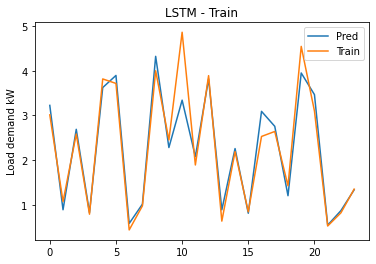

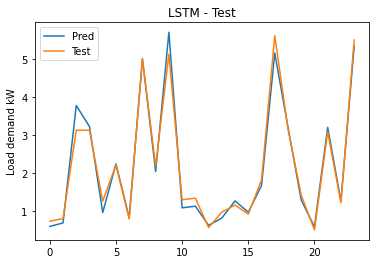

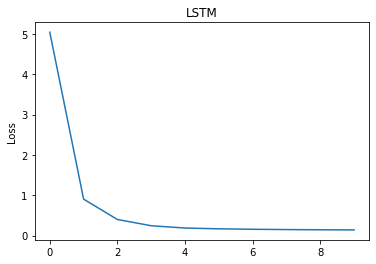

R2 Score :  0.9483151389337512
Adjusted R2 Score :  0.9482915169679987
Training RMSE :  2.2994187700579456
Testing RMSE :  2.2474407238639023
MAE :  0.22379587507303964
MSE :  0.1412937343120575


In [ ]:
y_pred_train = lstm.predict(x_train)
y_pred = lstm.predict(x_test)

plt.plot(y_pred_train[:24])
plt.plot(y_train[:24])
plt.legend(('Pred', 'Train'))
plt.ylabel('Load demand kW')
plt.title('LSTM - Train')
plt.show()

plt.plot(y_pred[:24])
plt.plot(y_test[:24])
plt.legend(('Pred', 'Test'))
plt.ylabel('Load demand kW')
plt.title('LSTM - Test')
plt.show()

plt.plot(hist_lstm.history['loss'])
plt.ylabel('Loss')
plt.title('LSTM')
plt.show()

r2 = r2_score(y_test, y_pred)
print("R2 Score : ", r2)
adj_r2 = 1 - (1-r2)*(len(x_test) - 1) / (len(x_test) - x_test.shape[1] - 1)
print("Adjusted R2 Score : ", adj_r2)
temp = y_pred_train - y_train
lstm_train_rmse = np.sqrt(np.mean(temp * temp))
print("Training RMSE : ",lstm_train_rmse)
temp = y_pred - y_test
lstm_test_rmse = np.sqrt(np.mean(temp * temp))
print("Testing RMSE : ",lstm_test_rmse)
print("MAE : ", mean_absolute_error(y_test, y_pred))
print("MSE : ", hist_lstm.history['loss'][-1])